In [11]:
#Basic Import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# Load the LFW people dataset
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)
X= lfw_people.data
images = lfw_people.images
h, w = images.shape[1], images.shape[2]

In [3]:
X.shape, images.shape

((1560, 1850), (1560, 50, 37))

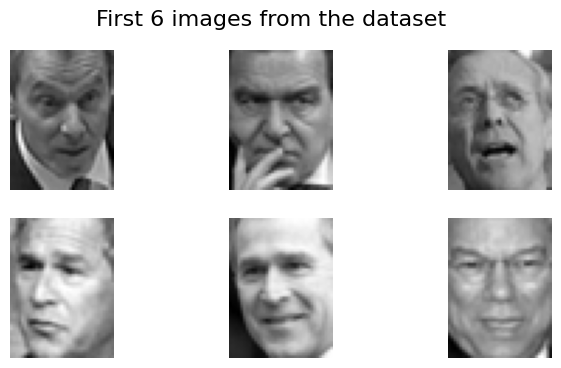

In [5]:
n_show = 6
plt.figure(figsize=(8, 4))
for i in range(n_show):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.axis("off")
plt.suptitle("First %d images from the dataset" % n_show, size=16)
plt.show()

Shape of the image:  (50, 37)


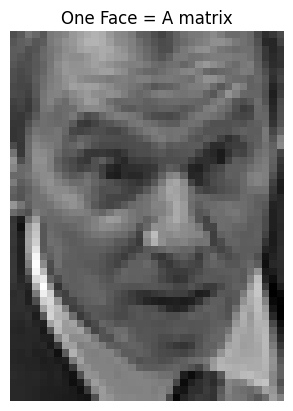

[[0.31764707 0.35555556 0.45228758 0.40261438 0.34901962]
 [0.34640524 0.3764706  0.39869282 0.34509805 0.36732027]
 [0.36601308 0.37254903 0.3254902  0.3385621  0.40392157]
 [0.3620915  0.3372549  0.3124183  0.35424837 0.41045752]
 [0.34379086 0.31764707 0.32287583 0.3529412  0.39477125]]


In [9]:
idx = 0
face = images[idx]
print("Shape of the image: ", face.shape)
plt.imshow(face, cmap=plt.cm.gray)
plt.title("One Face = A matrix")
plt.axis("off")
plt.show()
print(face[:5, :5])  # Print the top-left 5x5 corner of the image matrix

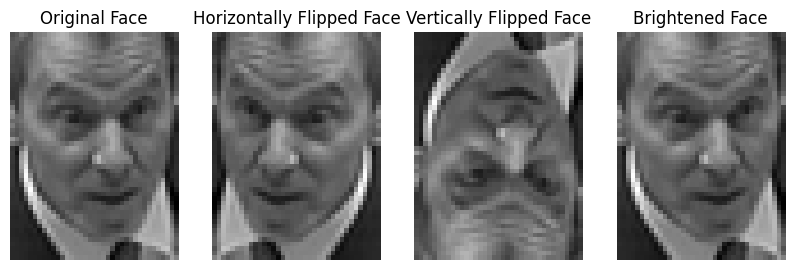

In [14]:
# Horizontal flip of the image
face_hflip = face[:, ::-1]
# Vertical Flip of the image
face_vflip = face[::-1, :]

#Brighten (add constant and clip to range)

face_bright = np.clip(face+30, 0, 255)

plt.figure(figsize=(10, 4))

plt.subplot(1, 4, 1)
plt.title("Original Face")
plt.imshow(face, cmap=plt.cm.gray)
plt.axis("off")


plt.subplot(1, 4, 2)
plt.title("Horizontally Flipped Face")
plt.imshow(face_hflip, cmap=plt.cm.gray)
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Vertically Flipped Face")
plt.imshow(face_vflip, cmap=plt.cm.gray)
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Brightened Face")
plt.imshow(face_bright, cmap=plt.cm.gray)
plt.axis("off")

plt.show()

In [15]:
# Choosing the number of comonents (eigenfaces) to extract
n_componenets = 100
pca = PCA(n_components=n_componenets,random_state=0, whiten=True)
pca.fit(X)

eignefaces = pca.components_.reshape((n_componenets, h, w))
print("Eigenfaces shape: ", eignefaces.shape)


Eigenfaces shape:  (100, 50, 37)


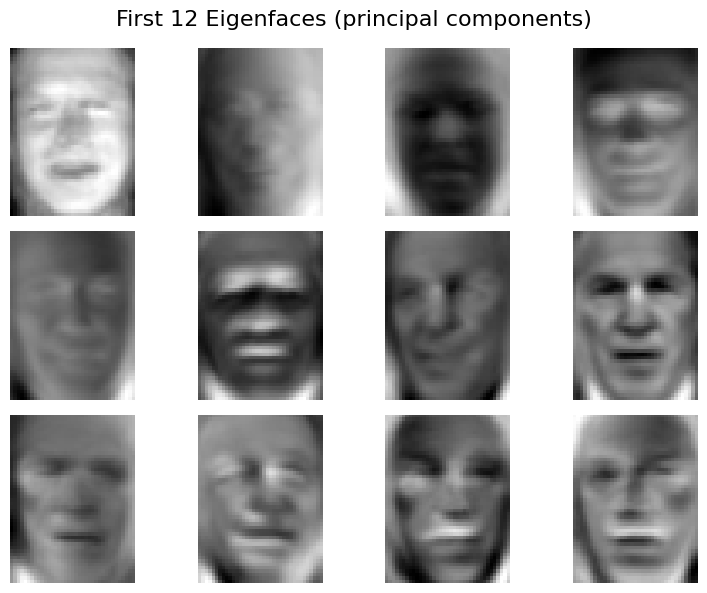

In [16]:
n_show = 12
plt.figure(figsize=(8, 6))
for i in range(n_show):
    plt.subplot(3, 4, i + 1)
    plt.imshow(eignefaces[i], cmap=plt.cm.gray)
    plt.axis("off")
plt.suptitle("First %d Eigenfaces (principal components)" % n_show, size=16)    
plt.tight_layout()
plt.show()

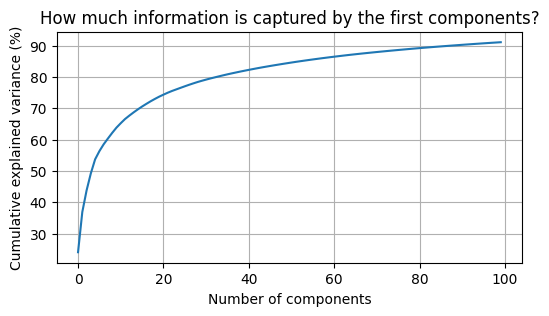

In [17]:
plt.figure(figsize=(6, 3))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance (%)")
plt.title("How much information is captured by the first components?")
plt.grid(True)
plt.show()

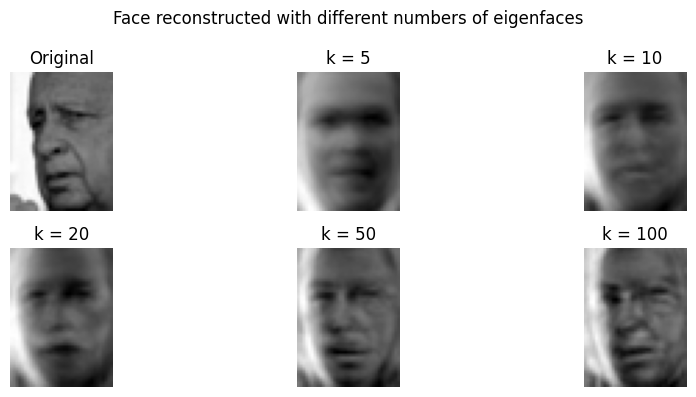

In [18]:
def reconstruct_with_k(k, X, idx=0):
   pca_k = PCA(n_components=k, whiten=True, random_state=0)
   pca_k.fit(X)
   coeffs = pca_k.transform(X[idx:idx+1])
   recon = pca_k.inverse_transform(coeffs)
   return recon.reshape(h, w)
idx = 10  # pick a face index
original = images[idx]
components_list = [5, 10, 20, 50, 100]
plt.figure(figsize=(10, 4))
plt.subplot(2, 3, 1)
plt.imshow(original, cmap='gray')
plt.title("Original")
plt.axis('off')
for i, k in enumerate(components_list):
   recon = reconstruct_with_k(k, X, idx=idx)
   plt.subplot(2, 3, i + 2)
   plt.imshow(recon, cmap='gray')
   plt.title(f"k = {k}")
   plt.axis('off')
plt.suptitle("Face reconstructed with different numbers of eigenfaces")
plt.tight_layout()
plt.show()

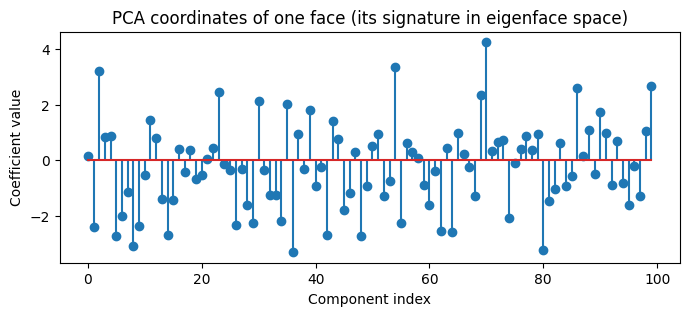

In [20]:
# Show the "signature" (PCA coefficients) of one face
coeffs = pca.transform(X[idx:idx+1])[0]
plt.figure(figsize=(8,3))
plt.stem(coeffs)
plt.title("PCA coordinates of one face (its signature in eigenface space)")
plt.xlabel("Component index")
plt.ylabel("Coefficient value")
plt.show()